# Đồ án cuối kỳ

**Các thành viên của nhóm 2:**
1. MSSV: 1712496 - Họ tên: Nguyễn Trần Công Huy
2. MSSV: 1712556 - Họ tên: Hoàng Huy Lịch

---

## Import thư viện

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

---

## Thu thập dữ liệu

Trong đồ án lần này, nhóm em sẽ sử dụng dữ liệu đã được thu thập sẵn là file "*data.csv*"; đây là dữ liệu về số lượng người tự tử thống kê theo từng năm trên từng quốc gia từ 1985 đến 2016. <br>
Dữ liệu này đã được public trên [Kaggle](https://www.kaggle.com/), gốc ở [đây](https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016). <br>
Tập dữ liệu này được merged từ 4 nguồn khác nhau với key là thời gian và vị trí địa lý, lần lượt gồm:
- [United Nations Development Program. (2018). Human development index (HDI)](http://hdr.undp.org/en/indicators/137506).
- [World Bank. (2018). World development indicators: GDP (current US$\$$) by country: 1985 to 2016](http://databank.worldbank.org/data/source/world-development-indicators#).
- [[Szamil]. (2017). Suicide in the Twenty-First Century [dataset]](https://www.kaggle.com/szamil/suicide-in-the-twenty-first-century/notebook).
- [World Health Organization. (2018). Suicide prevention](https://www.who.int/health-topics/suicide).

---

## Khám phá dữ liệu

### Đọc dữ liệu từ file .csv vào Dataframe

In [50]:
suicide_df = pd.read_csv('data.csv')
suicide_df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,2156624900,796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,2156624900,796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,2156624900,796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,2156624900,796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,2156624900,796,Boomers


### Dữ liệu gồm bao nhiêu dòng và cột?

In [51]:
num_rows, num_cols = suicide_df.shape
print(f'Bộ dữ liệu có {num_rows} dòng và {num_cols} cột')

Bộ dữ liệu có 27820 dòng và 12 cột


### Mỗi dòng có ý nghĩa gì?  Có vấn đề các dòng có ý nghĩa khác nhau không?

Mỗi dòng tượng trưng cho một nhóm người được chia theo độ tuổi thống kê tại một quốc gia ở một thời điểm nhất định với các thông tin (có thể) liên quan tới số lượng người tự tử trong nhóm ấy.

### Dữ liệu có các dòng bị lặp không?

In [52]:
have_duplicated_rows = any(suicide_df.duplicated())
have_duplicated_rows

False

### Mỗi cột có ý nghĩa gì?

Mô tả ý nghĩa các cột trong dữ liệu này: <br>
- **country**: tên của quốc gia.
- **year**: năm đang xét.
- **sex**: giới tính.
- **age**: nhóm độ tuổi.
- **suicides_no**: số lượng người tự tử trong nhóm này.
- **population**: tổng số người thống kê được trong nhóm này.
- **suicides/100k pop**: số lượng người tự tử trong 100.000 người .
- **country-year**: tên của quốc gia + năm.
- **HDI for year**: chỉ số HDI (human development index) trong năm của nhóm này.
- **gdp_for_year (\$)**: GDP trong năm của nhóm này.
- **gdp_per_capita (\$)**: GDP bình quân đầu người của nhóm này.
- **generation**: thế hệ của nhóm này.

### Mỗi cột hiện đang có kiểu dữ liệu gì? Có cột nào có kiểu dữ liệu chưa phù hợp để có thể xử lý tiếp không?

In [53]:
col_dtypes = suicide_df.dtypes
col_dtypes

country                object
year                    int64
sex                    object
age                    object
suicides_no             int64
population              int64
suicides/100k pop     float64
country-year           object
HDI for year          float64
gdp_for_year ($)        int64
gdp_per_capita ($)      int64
generation             object
dtype: object

**Cột có dtype là object nghĩa là sao?**

`suicide_df` có 4 cột có `dtype` là `object` gồm: 'country', 'sex', 'age', 'country-year' và 'generation', ta cần tìm xem kiểu dữ liệu thật của các cột này là gì.

In [54]:
def get_type(e):
    return type(e[0])


def open_object_dtype(s):
    dtypes = set()
    dtypes.update(np.apply_along_axis(get_type, 1, s.values[:, np.newaxis]))
    return dtypes


object_type_columns = np.array(
    ['country', 'sex', 'age', 'country-year', 'generation'])
for col in object_type_columns:
    print(f"Cột '{col}' có kiểu: {open_object_dtype(suicide_df[col])}")

Cột 'country' có kiểu: {<class 'str'>}
Cột 'sex' có kiểu: {<class 'str'>}
Cột 'age' có kiểu: {<class 'str'>}
Cột 'country-year' có kiểu: {<class 'str'>}
Cột 'generation' có kiểu: {<class 'str'>}


Vậy không có cột nào có tình trạng hỗn hợp nhiều kiểu dữ liệu.

### Với mỗi cột có kiểu dữ liệu dạng số (numeric), các giá trị được phân bố như thế nào?

Ta có 7 cột thuộc nhóm numeric gồm: 'year', 'suicides_no', 'population', 'suicides/100k pop', 'HDI for year', 'gdp_for_year (\\$)' và 'gdp_per_capita (\\$)'.
Trong mục này, ta sẽ tìm tỉ lệ thiếu sót, giá trị max và min trên từng cột nói trên.

In [55]:
numeric_columns = np.array([
    'year', 'suicides_no', 'population', 'suicides/100k pop', 'HDI for year',
    'gdp_for_year ($)', 'gdp_per_capita ($)'
])


def missing_ratio(numerics):
    return numerics.isna().mean() * 100


numeric_df = suicide_df[numeric_columns]
nume_col_profiles_df = numeric_df.agg(
    [missing_ratio, pd.Series.min, pd.Series.max])
nume_col_profiles_df

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_for_year ($),gdp_per_capita ($)
missing_ratio,0.0,0.0,0.0,0.00,69.935298,0.000000e+00,0.0
min,1985.0,0.0,278.0,0.00,0.483000,4.691962e+07,251.0
max,2016.0,22338.0,43805214.0,224.97,0.944000,1.812071e+13,126352.0


Cột 'HDI for year' có tỉ lệ giá trị thiếu khá cao, đáng xem xét để được loại bỏ.

### Với mỗi cột có kiểu dữ liệu phân loại (categorical), các giá trị được phân bố như thế nào?

Ta có 5 cột thuộc nhóm categorical gồm: 'country', 'sex', 'age', 'country-year' và 'generation'.
Trong mục này, ta sẽ tìm tỉ lệ thiếu sót,  số lượng giá trị khác nhau, list/array các giá trị khác nhau của các cột nói trên.

In [56]:
categorical_columns = np.array([ 'country', 'sex', 'age', 'country-year', 'generation'])
categorical_df = suicide_df[categorical_columns]
cate_col_profiles_df = categorical_df.agg(
    [missing_ratio, pd.Series.nunique, pd.Series.unique])
cate_col_profiles_df.rename(index={
    'nunique': 'num_diff_vals',
    'unique': 'diff_vals'
}, inplace=True)
cate_col_profiles_df

,country,sex,age,country-year,generation
missing_ratio,0,0,0,0,0
num_diff_vals,101,2,6,2321,6
diff_vals,"[Albania, Antigua and Barbuda, Argentina, Arme...","[male, female]","[15-24 years, 35-54 years, 75+ years, 25-34 ye...","[Albania1987, Albania1988, Albania1989, Albani...","[Generation X, Silent, G.I. Generation, Boomer..."


Các cột này có vẻ không xảy ra vấn đề gì, tuy nhiên như có thể thấy, cột 'country-year' chỉ là một chuỗi kết hợp giữa giá trị từ cột 'country' và cột 'year', không đem lại nhiều ý nghĩa, nên xem xét để được loại bỏ.

## Tiền xử lý

### Loại bỏ cột 'HDI for year' và cột 'country-year'

In [57]:
dropping_columns = np.array(['HDI for year','country-year'])
suicide_df.drop(columns=dropping_columns, inplace=True)
suicide_df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,2156624900,796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,2156624900,796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,2156624900,796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,2156624900,796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,2156624900,796,Boomers


## Các câu hỏi có ý nghĩa

- Xu hướng tăng giảm của tỉ lệ tự tử trên từng quốc gia như thế nào đồng thời chỉ ra những quốc gia đứng top trending?
- Lợi ích: Cung cấp cho những người có nhu cầu nhập cư nước ngoài một nguồn thông tin tham khảo các quốc gia có tiềm năng với tỉ lệ tự tử thấp, bởi lẽ những quốc gia có tỉ lệ này ngày càng tăng chắc chắn có vấn đề.


## Khám phá dữ liệu (tiếp tục)

In [58]:
def draw_graph(num_countries, country_df, countries):
    n_rows, n_cols = int(math.ceil(num_countries/3)), 3
    fig, ax = plt.subplots(n_rows,n_cols, figsize=(15,15))
    colors = np.random.rand(num_countries, 3)
    max_suicides = country_df.max()
    for index in range(0, n_rows * n_cols):
        row, col  = int(index/3), index%3
        if index < num_countries:
            country = countries[index]
            years = country_df[country].index
            suicides_sum = country_df[country].values
            ax[row, col].xaxis.set_major_locator(plt.MaxNLocator(integer=True))
            ax[row, col].set_ylim((0, max_suicides + 1))
            ax[row, col].plot(years,suicides_sum, marker='o',color=colors[index])
            ax[row, col].set_title(country)
            ax[row, col].set_xlabel('Year')
            ax[row, col].set_ylabel('Suicides')
        else:
            ax[row, col].axis('off')
    fig.tight_layout()

### Số lượng mẫu thu thập được qua từng năm

Ngoài ra, ta còn cần kiểm tra xem, ứng với từng năm thì số lượng thông tin thống kê được có chênh lệch ở một mức độ chấp nhận được hay không, để xem xét loại bỏ những năm thiếu sót dữ liệu quá lớn.

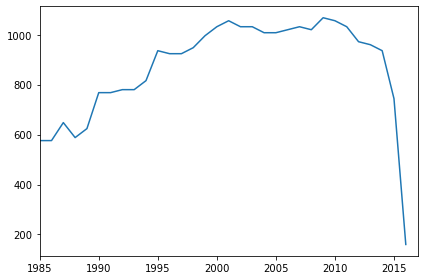

In [59]:
year_profiles_df = suicide_df.groupby(['year'])['year'].count()
plt.plot(year_profiles_df.keys(), year_profiles_df.values)
plt.xlim(1985,2017)
plt.tight_layout()

Vào năm 2016, lượng thông tin thu thập được thấp một cách bất thường, cần xem xét để được loại bỏ.

---

### Trường hợp các quốc gia có năm tỉ lệ tự tử bằng không

Trong dữ liệu trên, có những quốc gia một số năm tỉ lệ tự tử bằng không, dễ cho ta cảm giác không hợp lý, ta cần kiểm tra xem, những năm còn lại thu thập được tại quốc gia đó có tỉ lệ này như thế nào, nếu mà độ chênh lệch quá lớn, thì ta có thể xem đây là thông tin gây nhiễu.

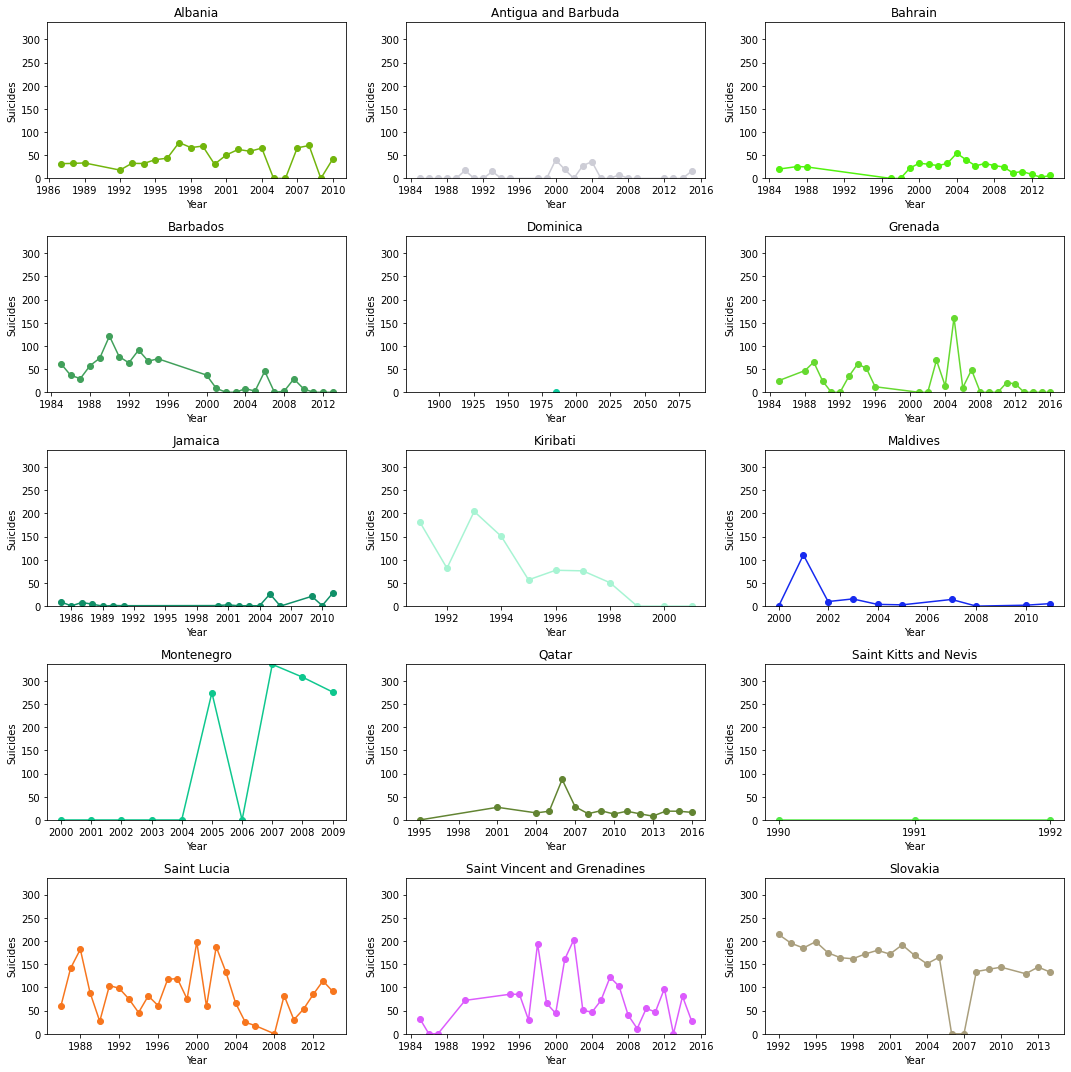

In [60]:
# extract countries with at least one year having no suicides
suicides_by_country_df = suicide_df.groupby(['country','year'])['suicides/100k pop'].sum()
zero_suicide_countries = suicides_by_country_df[suicides_by_country_df == 0].\
                            index.get_level_values('country').unique().tolist()
suicides_by_country_df = suicides_by_country_df.loc[suicides_by_country_df.\
                            index.get_level_values('country').isin(zero_suicide_countries)]
draw_graph(len(zero_suicide_countries), suicides_by_country_df, zero_suicide_countries)

Từ biểu đồ trên, hầu hết những năm không có ca tự tử nào lại có số ca tự tử rất cao, đến mức có thể xem là vô lí cho nên ta tạm kết luận những năm có số ca tự tử là 0 có nghĩa là quá trình thu thập thông tin của năm đó có vấn đề.

---

### Trường hợp những quốc gia có ít mẫu thu thập được

Ta sẽ lấy 10% các quốc gia có số mẫu thu thập ít nhất để đánh giá, các quốc gia ấy sẽ được lưu vào `least_recorded_countries`.

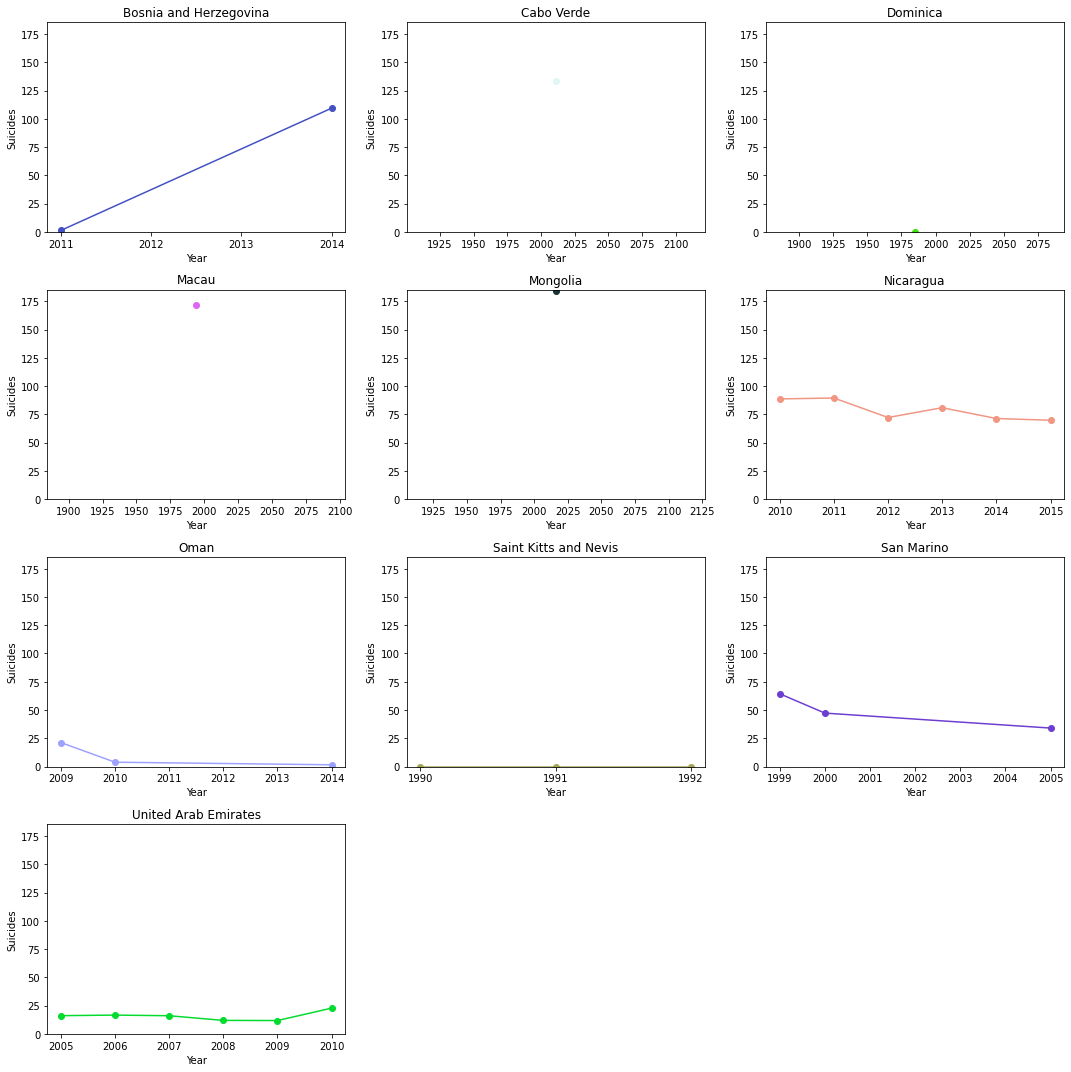

In [61]:
p = [10]
records_df = suicide_df.groupby(['country', 'year'])['year']\
                       .count().unstack(1).apply([pd.Series.sum], axis=1)
records_df = records_df.unstack(1)[('sum')]
records_df=records_df.to_frame(name='total_samples')
partition = np.percentile(records_df['total_samples'], q=p)[0]
least_recorded_countries = records_df[records_df['total_samples'] < partition].index
suicides_by_country_df = suicide_df.groupby(['country','year'])['suicides/100k pop'].sum()
suicides_by_country_df = suicides_by_country_df.loc[suicides_by_country_df.\
                            index.get_level_values('country').isin(least_recorded_countries)]
draw_graph(len(least_recorded_countries), suicides_by_country_df, least_recorded_countries)

Với các quốc gia chỉ có 2 hoặc 3 mẫu dữ liệu, thì không hề cho ta biết được xu hướng của tỉ lệ tử vong tại nước này diễn ra như thế nào, các quốc gia còn lại tuy dễ hình dung hơn nhưng vì lượng dữ liệu quá ít nên hiện tại (2021), mọi thứ rất có thể đã thay đổi hoàn toàn khác so với biểu đồ trên.

## Tiền xử lý (tiếp tục)

### Xóa các mẫu thuộc năm 2016

In [62]:
year_2016_idx = suicide_df[suicide_df['year'] == 2016].index
suicide_df.drop(index=year_2016_idx, inplace=True)

In [63]:
suicide_df[suicide_df['year'] == 2016]

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation


### Xóa những năm mà quốc gia đó không có ca tự tử nào

In [64]:
suicides_by_country_df = suicide_df.groupby(['country','year'])['suicides/100k pop'].sum()
zero_suicide_year_by_country = list(suicides_by_country_df[suicides_by_country_df == 0].index)
for country, year in zero_suicide_year_by_country:
    indices = suicide_df[(suicide_df['country'] == country) & (suicide_df['year'] == year)].index
    suicide_df.drop(indices, axis=0, inplace=True)

In [65]:
updated_df = suicide_df.groupby(['country','year'])['suicides/100k pop'].sum()
updated_df[updated_df == 0]

Series([], Name: suicides/100k pop, dtype: float64)

### Loại bỏ top 10% các quốc gia có số mẫu thu thập ít nhất

Loại bỏ các quốc gia đã được lưu vào `least_recorded_countries` trong quá trình khám phá dữ liệu

In [66]:
lrc_idx = suicide_df[suicide_df['country'].isin(least_recorded_countries)].index
suicide_df.drop(index=lrc_idx, inplace=True)

In [67]:
suicide_df[suicide_df['country'].isin(least_recorded_countries)]

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation


## Phân tích dữ liệu để trả lời các câu hỏi trên

Đối với từng quốc gia, ta sẽ sử dụng đường hồi quy tuyến tính làm thước đo xu hướng tăng/giảm tỉ lệ tự tử, sau đó sẽ lưu các giá trị này vào `suicide_trend_df`.

In [68]:
avg_suicides_by_country_df = suicide_df.groupby(['country', 'year'])['suicides/100k pop'].mean().unstack(1)
countries = np.unique(suicide_df['country'].values)
suicide_trend_df = pd.DataFrame(columns=['intercept', 'bias'])

years = np.array(avg_suicides_by_country_df.columns)
for country in countries:
    suicides = np.array(avg_suicides_by_country_df.loc[country].values)
    idx = np.isfinite(suicides)
    coef = np.polyfit(years[idx], suicides[idx], 1)
    suicide_trend_df.loc[country, ['intercept', 'bias']] = coef 
    
suicide_trend_df = suicide_trend_df.sort_values(by=['intercept'], ascending=False)
suicide_trend_df.head()

,intercept,bias
Republic of Korea,1.22362,-2422.11
Guyana,0.963986,-1906.29
Suriname,0.448232,-875.115
Cyprus,0.308838,-616.959
Uruguay,0.262447,-505.488


Trực quan xu hướng tăng/giảm tỉ lệ tự tử của các quốc gia.

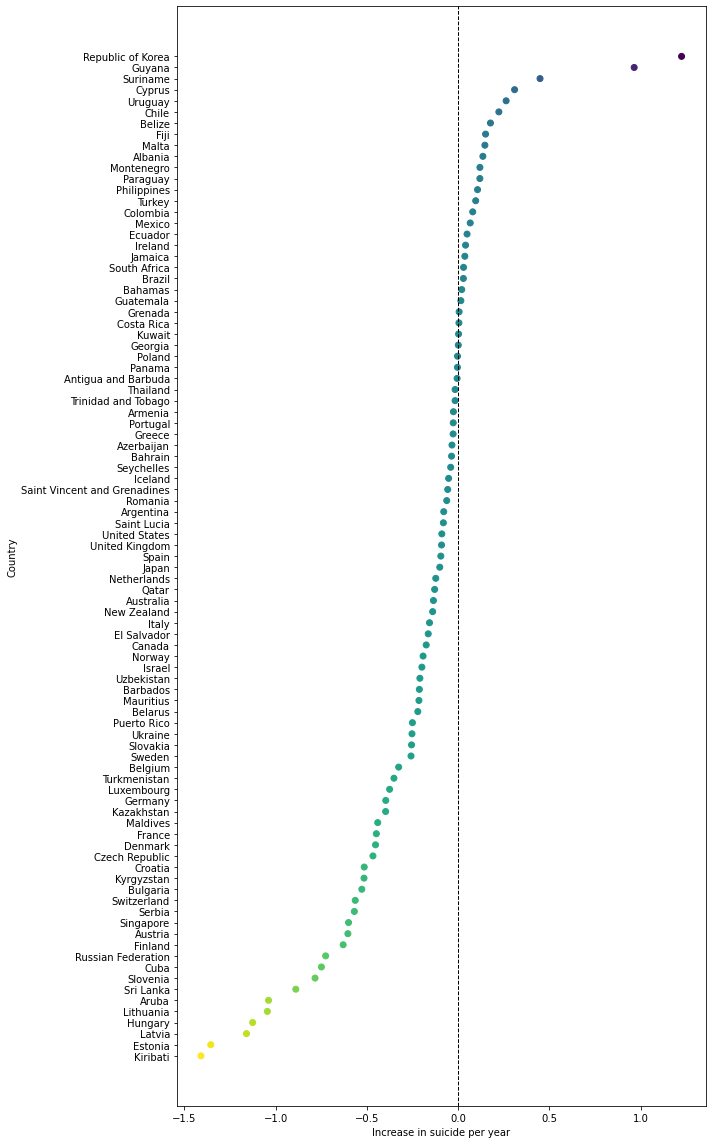

In [69]:
fig, ax = plt.subplots(figsize=(10, 16))
countries, increase_in_suicides = suicide_trend_df.index, suicide_trend_df.loc[:,'intercept']
ax.scatter(increase_in_suicides, countries, c= -1 * increase_in_suicides)
ax.axvline(0, color='k', linestyle='dashed', linewidth=1)
ax.set(xlabel='Increase in suicides per year', ylabel='Country')
ax.invert_yaxis()
plt.tight_layout()

In [70]:
print(f'Biểu đồ trên thể hiện xu hướng tăng giảm tỉ lệ tử vong của {len(suicide_trend_df)} quốc gia.')
print(f"Trong đó gồm {len(suicide_trend_df[suicide_trend_df['intercept'] > 0])} quốc gia có tỉ lệ này "
      f"tăng dần qua từng năm và {len(suicide_trend_df[suicide_trend_df['intercept'] < 0])} quốc gia giảm dần theo từng năm.")
print("Có thể xem đây là dấu hiệu tích cực.")

Biểu đồ trên thể hiện xu hướng tăng giảm tỉ lệ tử vong của 91 quốc gia.
Trong đó gồm 27 quốc gia có tỉ lệ này tăng dần qua từng năm và 64 quốc gia giảm dần theo từng năm.
Có thể xem đây là dấu hiệu tích cực.


---

Lấy các quốc gia top đầu xu hướng

In [71]:
def draw_trending_countries(num_graphs, countries):
    fig, ax = plt.subplots(int(math.ceil(num_graphs/3)), 3, figsize=(15,8))
    colors = np.random.rand(num_graphs, 3)
    years = np.array(avg_suicides_by_country_df.columns)
    for index, country in enumerate(countries):
        row, col = int(index / 3), index % 3
        suicides = np.array(avg_suicides_by_country_df.loc[country].values)
        intercept, bias = suicide_trend_df.loc[country,['intercept','bias']]
        ax[row, col].plot(years, suicides, 'o', years, intercept * years + bias, '--k', color=colors[index])
        ax[row, col].set_ylim((0, 60))
        ax[row, col].set_title(country)
        ax[row, col].set(xlabel='Year', ylabel='Suicides')
    plt.tight_layout()

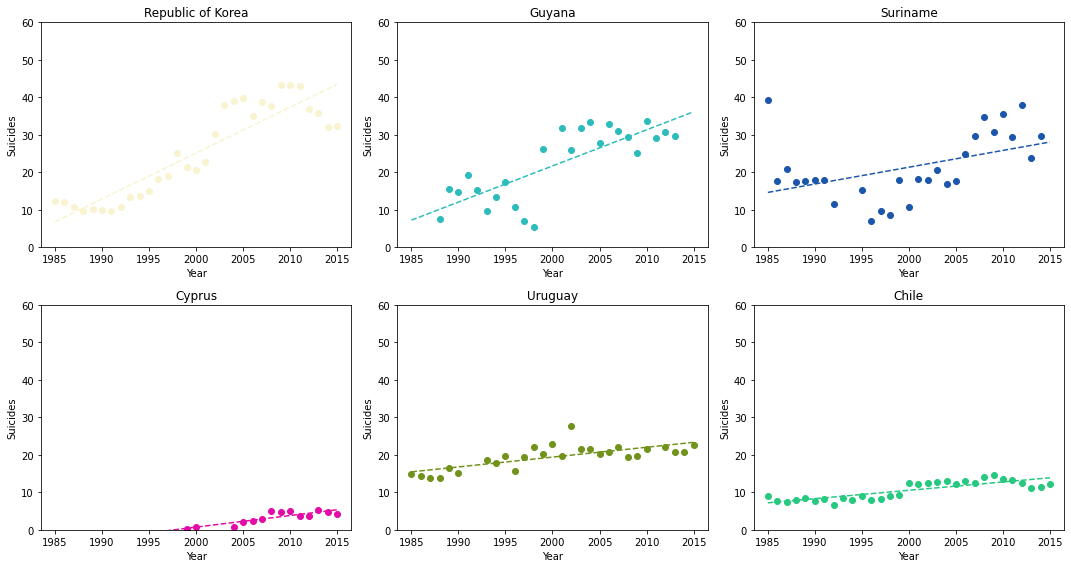

In [72]:
top_increasing_countries = suicide_trend_df[:6].index
draw_trending_countries(6, top_increasing_countries)

- Hàn Quốc tăng mạnh nhất trong tất cả, trung bình 1.2 người qua từng năm, ở những năm gần đây nhất thì có xu hướng đi xuống.
- Guyana từ năm 1998 đến 1999 nhảy vọt lên khá nhiều, có thể quá trình thu thập ở năm này có lỗi chăng.
- Các nước còn lại dao động qua từng năm không lớn lắm, chủ yếu là tăng đều.

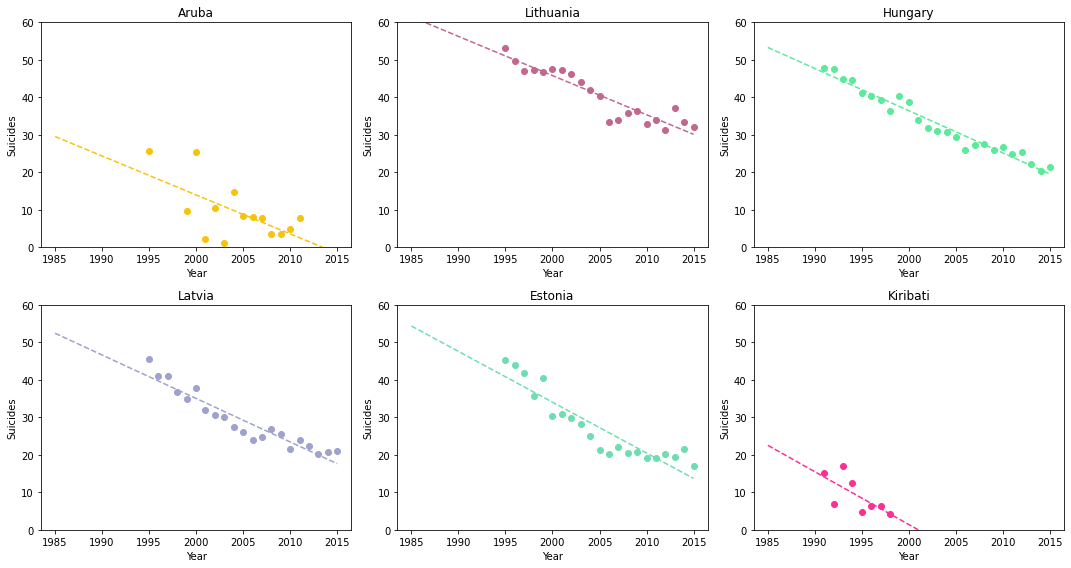

In [73]:
top_decreasing_countries = suicide_trend_df[-6:].index
draw_trending_countries(6, top_decreasing_countries)

- Kiritabi giảm nhiều nhất, trung bình 1.4 người qua từng năm, tuy nhiên dữ liệu tại quốc gia này có vẻ hơi ít.
- Aruba dao động khá lớn, tiêu biểu là hai pha ngụp lặn vào 2000-2001 và 2003-2004.
- Các nước còn lại giảm đều theo thời gian.